# CSO Pricing Methods Comparison



In [7]:
# python
import numpy as np
import matplotlib.pyplot as plt
from cso_lab.pricing import kirk_cso_price
from cso_lab.models import generate_correlated_paths

# Parameters (adjust as needed)
F1, F2 = 50.0, 45.0
K = 3.0
sigma1, sigma2 = 0.30, 0.25
rho = 0.2
T = 0.5
steps = 1  # generate_correlated_paths ignores steps in its current implementation but keep param

# analytic Kirk price
kirk = kirk_cso_price(F1, F2, K, sigma1, sigma2, rho, T)
assert np.isfinite(kirk) and kirk >= 0.0, "Kirk returned invalid price"

Kirk price: 5.779430

n, MC_mean, 2*SE, abs_diff_from_Kirk
   500, 5.634168, 0.652367, 0.145262
  1000, 5.694356, 0.529101, 0.085073
  5000, 5.999668, 0.233201, 0.220239
 10000, 5.866834, 0.162221, 0.087404
 20000, 5.845718, 0.115050, 0.066288
 50000, 5.739454, 0.072006, 0.039976


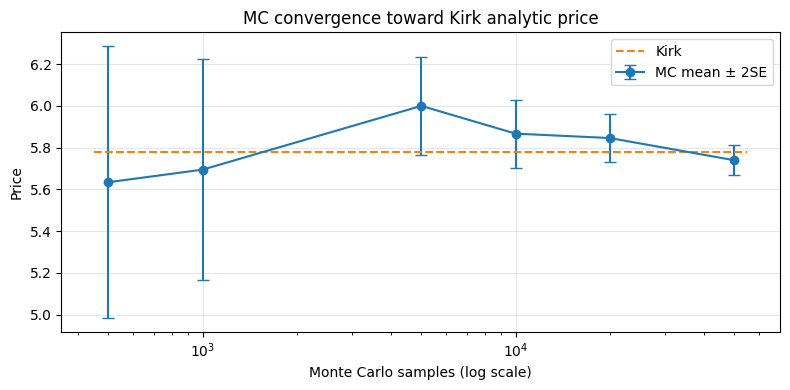

In [8]:


# sample sizes to test MC convergence
n_list = [500, 1000, 5000, 10000, 20000, 50000]
mc_means = []
mc_ses = []

for n in n_list:
    # deterministic but different streams per n for reproducibility
    np.random.seed(1000 + n)
    paths = generate_correlated_paths(0.0, 0.0, sigma1, sigma2, rho, F1, F2, T, steps, n)
    payoffs = np.maximum(paths[:, 0] - paths[:, 1] - K, 0.0)
    mean = float(payoffs.mean())
    se = float(payoffs.std(ddof=1) / np.sqrt(n))
    mc_means.append(mean)
    mc_ses.append(se)
    assert np.isfinite(mean) and mean >= 0.0, f"MC returned invalid price for n={n}"

# print numeric summary
print(f"Kirk price: {kirk:.6f}\n")
print("n, MC_mean, 2*SE, abs_diff_from_Kirk")
for n, m, s in zip(n_list, mc_means, mc_ses):
    print(f"{n:6d}, {m:8.6f}, {2*s:8.6f}, {abs(m - kirk):8.6f}")

# plot convergence: MC mean with ±2*SE and horizontal Kirk line
plt.figure(figsize=(8,4))
plt.errorbar(n_list, mc_means, yerr=[2*s for s in mc_ses], fmt='o-', capsize=4, label='MC mean ± 2SE')
plt.hlines(kirk, xmin=min(n_list)*0.9, xmax=max(n_list)*1.1, colors='C1', linestyles='--', label='Kirk')
plt.xscale('log')
plt.xlabel('Monte Carlo samples (log scale)')
plt.ylabel('Price')
plt.title('MC convergence toward Kirk analytic price')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
